<a href="https://colab.research.google.com/github/JuhiNayak/Machine-Learning/blob/master/CMPE257Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 257: Week6 Homework

Use feature transformation to compare accuracy. Feature Transformation includes many steps that helps to create new features based on the existing features. It is simply a function that transforms features from one representation to another. We have followed a few ways mentioned below to achieve this.

* Transforming categorical features to numerical.
* Scaling or normalizing features within a range, say between 0 to 1.
* Data Imputation.
* SVM also transforms features internally.

*References*:

https://medium.com/vickdata/four-feature-types-and-how-to-transform-them-for-machine-learning-8693e1c24e80

https://scikit-learn.org/stable/data_transforms.html

https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

*Data Source*:

Loan Prediction Problem Dataset: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

Lending Club Dataset: https://www.kaggle.com/wordsforthewise/lending-club

Features Analysis Excel: https://sjsu0-my.sharepoint.com/:x:/g/personal/juhi_nayak_sjsu_edu/EXjGpC6keKRPkbOKv_nb5kcBo_NcIAqFsReNJq-B5N5yPA?e=lUnXU3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', -1)
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, accuracy_score, f1_score

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Transforming categorical features to numerical

We have aready performed various steps for data cleaning and preparation while merging the two datasets. So we have saved the final data into one csv file for further use. The csv file that we use here is the final csv file where we have already performed step to transform categorial features to numerical.

In [ ]:
path = "/content/drive/My Drive/datasets/loan-prediction/BankLoanApprovalFinalDataset.csv"
df = pd.read_csv(path)
df.head(5)

,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status,Annual_Income,Employed,Purpose,Home_Ownership,dti
0,146.412162,360,1,1,5849.0,1,4,1,30.510709
1,128.000000,360,1,0,6091.0,1,4,1,30.503228
2,66.000000,360,1,1,3000.0,1,4,1,30.577049
3,120.000000,360,1,1,4941.0,1,4,1,30.531795
4,141.000000,360,1,1,6000.0,1,4,1,30.506485


## Categorise the variable type

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47dfb24438>,
      dtype=object)

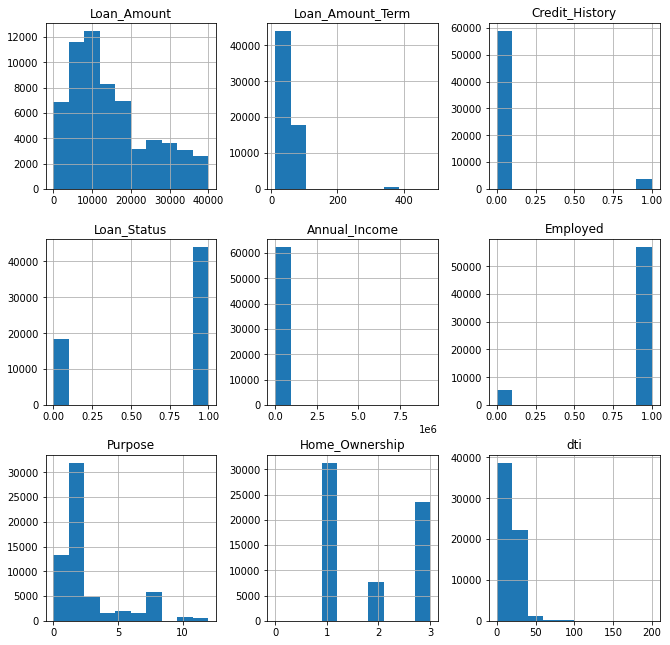

In [ ]:
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

The above histograms of all the numerical features helps to categorise the variable types in the dataset. The ***continuous*** (infinite values) features display a continuous distribution pattern, whilst the ***dichotomous*** (2 possible values usually 0 and 1) features have only two bars.The ***nominal*** (2 or more possible values with no meaningful order or rank) and ***ordinal*** (2 or more possible values with a meaningful order or rank) variables can sometimes be trickier to determine, and may require some further knowledge of the dataset or some specific domain knowledge 

## Feature Scaling

The continuous variables in our dataset are at varying scales. For instance, refering to the histograms above we can see that the variable “Loan_Amount” ranges from 0 to 40000, whilst “Annual_Income” ranges from 0 to 7.5. This may cause a problem to make the final predictions. Standardising the scale for all continuous variables can often result in an increase in performance of machine learning models.
We have tried Sci-Kit Learn Standard Scalar function to scale our data.

In [ ]:
X = df[['Purpose','Loan_Amount','Annual_Income','dti']]
y = df[['Loan_Status']]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.712537981768751
Recall: 1.0


We got a similar accuracy with SVM performed on scaler data as compared to our experient with other classifiers.

## Test-Train split

In [ ]:
path = "/content/drive/My Drive/datasets/loan-prediction/BankLoanApprovalFinalDataset1.csv"
df = pd.read_csv(path)
df.head(5)

,Loan_Amount,Loan_Amount_Term,Credit_History,Annual_Income,Employed,Purpose,Home_Ownership,dti,Loan_Status
0,146.412162,360,1,5849.0,1,4,1,30.510709,1
1,128.000000,360,1,6091.0,1,4,1,30.503228,0
2,66.000000,360,1,3000.0,1,4,1,30.577049,1
3,120.000000,360,1,4941.0,1,4,1,30.531795,1
4,141.000000,360,1,6000.0,1,4,1,30.506485,1


In [ ]:
#Splitting All the features in X and Target feature in y
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

## Training Data with Different Models

Feature Scaling by Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Fit on training set only
scaler.fit(X)

#Apply transform on both training and test set
X = scaler.transform(X)

In [ ]:
X=pd.DataFrame(X, index=df.index)

final_loan_normal = pd.concat((X,y), axis=1, join='outer')

In [ ]:
final_loan_normal.to_csv('bank_final_normal.csv')

In [ ]:
df_bank = pd.read_csv('bank_final_normal.csv')
df_bank.head(5)

,Unnamed: 0,0,1,2,3,4,5,6,7,Loan_Status
0,0,-1.476622,9.799977,4.082068,-0.969802,0.307573,0.498323,-0.941115,0.988766,1
1,1,-1.478396,9.799977,4.082068,-0.966724,0.307573,0.498323,-0.941115,0.988161,0
2,2,-1.484371,9.799977,4.082068,-1.006043,0.307573,0.498323,-0.941115,0.994133,1
3,3,-1.479167,9.799977,4.082068,-0.981352,0.307573,0.498323,-0.941115,0.990472,1
4,4,-1.477143,9.799977,4.082068,-0.967881,0.307573,0.498323,-0.941115,0.988424,1


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20, random_state=50)

### Model 1: SVM with L1(Binary)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score, recall_score

f1_score_train = []
f1_score_test = []
recall_train = []
recall_test = []


chunksize = 5000

estimator = SGDClassifier(loss='hinge', penalty='l1', l1_ratio=1)
for i,chunk in enumerate(pd.read_csv('bank_final_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    # Since our focus is on default loan class, the parameter pos_label is set to 0
    f_te = f1_score(y_test,y_pred_test,pos_label=0)
    f_ta = f1_score(y_train,y_pred_train, pos_label=0)
    
    rc_test=recall_score(y_test,y_pred_test, pos_label=0)
    rc_train=recall_score(y_train,y_pred_train, pos_label=0)
       
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    
    recall_train.append(rc_train)
    recall_test.append(rc_test)

In [ ]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))

print('Average Recall score is : {0:0.2f}'.format(sum(recall_test)/len(recall_test)))

Average f1 score :  0.31
Average Recall score is : 0.28


In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.43      0.28      0.34      3705
           1       0.74      0.84      0.79      8801

    accuracy                           0.68     12506
   macro avg       0.58      0.56      0.56     12506
weighted avg       0.64      0.68      0.65     12506



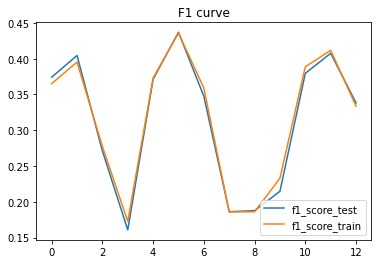

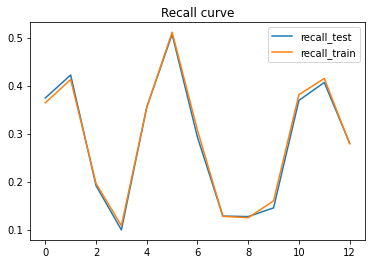

In [ ]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

plt.plot(recall_test)
plt.plot(recall_train)
plt.legend(('recall_test','recall_train'))
plt.title('Recall curve')
plt.show()

### Model 2:Logistic Regression with L1(Binary)

In [ ]:
#Logistic Regression
from sklearn.metrics import roc_auc_score

auc_train = []
auc_test = []
chunksize = 5000

estimator = SGDClassifier(loss='log', penalty='l1', l1_ratio=1)
for i,chunk in enumerate(pd.read_csv('bank_final_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict_proba(X_test)[:,1]
    y_pred_train = estimator.predict_proba(X_train)[:,1]
    
    auc_tr=roc_auc_score(y_train,y_pred_train,average='micro')
    auc_te=roc_auc_score(y_test,y_pred_test, average='micro')
    
    auc_train.append(auc_tr)
    auc_test.append(auc_te)

In [ ]:
print('Average AUC Score : {0:0.2f}' .format(sum(auc_test)/len(auc_test)))

Average AUC Score : 0.57


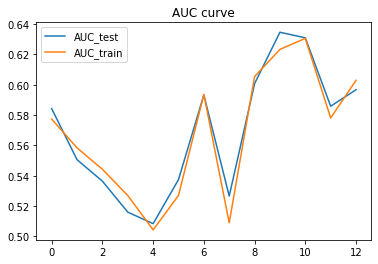

In [ ]:
plt.plot(auc_train)
plt.plot(auc_test)
plt.legend(('AUC_test','AUC_train'))
plt.title('AUC curve')
plt.show()

### Model 3:SVM with L2(Binary)

In [ ]:
f1_score_train = []
f1_score_test = []

recall_train = []
recall_test=[]

chunksize = 5000

estimator = SGDClassifier(loss='hinge', penalty='l2', l1_ratio=0)
for i,chunk in enumerate(pd.read_csv('bank_final_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test, pos_label=0)
    f_ta = f1_score(y_train,y_pred_train, pos_label=0)
    
    rc_test = recall_score(y_test,y_pred_test, pos_label=0)
    rc_train = recall_score(y_train, y_pred_train,pos_label=0)
    
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    
    recall_train.append(rc_train)
    recall_test.append(rc_test)

In [ ]:

print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))

print('Average Recall score is : {0:0.2f}'.format(sum(recall_test)/len(recall_test)))

Average f1 score :  0.26
Average Recall score is : 0.24


In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.34      0.02      0.05      3705
           1       0.70      0.98      0.82      8801

    accuracy                           0.70     12506
   macro avg       0.52      0.50      0.43     12506
weighted avg       0.60      0.70      0.59     12506



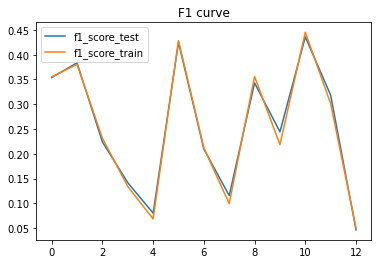

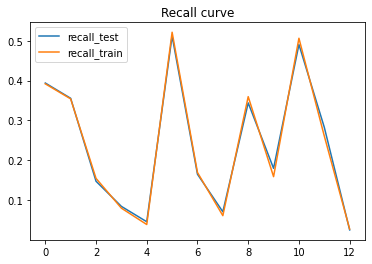

In [ ]:

plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

plt.plot(recall_test)
plt.plot(recall_train)
plt.legend(('recall_test','recall_train'))
plt.title('Recall curve')
plt.show()

Gaussian Kernel

In [ ]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 221 3484]
 [ 135 8666]]
              precision    recall  f1-score   support

           0       0.62      0.06      0.11      3705
           1       0.71      0.98      0.83      8801

    accuracy                           0.71     12506
   macro avg       0.67      0.52      0.47     12506
weighted avg       0.69      0.71      0.61     12506



Sigmoid Kernel

In [ ]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1263 2442]
 [2259 6542]]
              precision    recall  f1-score   support

           0       0.36      0.34      0.35      3705
           1       0.73      0.74      0.74      8801

    accuracy                           0.62     12506
   macro avg       0.54      0.54      0.54     12506
weighted avg       0.62      0.62      0.62     12506



### Model 4:Logistic Regression with L2(Binary)

In [ ]:
#Logistic Regression

auc_train = []
auc_test = []


chunksize = 5000

estimator = SGDClassifier(loss='log', penalty='l2', l1_ratio=0)
for i,chunk in enumerate(pd.read_csv('bank_final_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict_proba(X_test)[:,1]
    y_pred_train = estimator.predict_proba(X_train)[:,1]
    
    auc_tr=roc_auc_score(y_train,y_pred_train,average='micro')
    auc_te=roc_auc_score(y_test,y_pred_test, average='micro')
    
    auc_train.append(auc_tr)
    auc_test.append(auc_te)

In [ ]:
print('Average AUC Score : {0:0.2f}' .format(sum(auc_test)/len(auc_test)))

Average AUC Score : 0.58


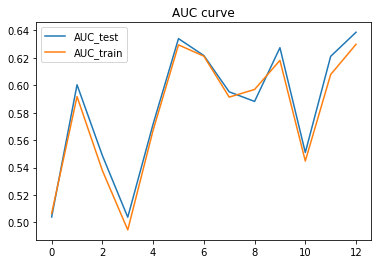

In [ ]:
plt.plot(auc_train)
plt.plot(auc_test)
plt.legend(('AUC_test','AUC_train'))
plt.title('AUC curve')
plt.show()

### Model 5: Multi Layer Perceptron(Binary Classification)

In [ ]:
from sklearn.neural_network import MLPClassifier

f1_score_train = []
f1_score_test = []

recall_train = []
recall_test = []

chunksize = 5000

# After tuning the parameter alpha, we get the best model for alpha = 1 and the hidden layer sizes of 2056

estimator = MLPClassifier(hidden_layer_sizes=(2056,),alpha=1)
for i,chunk in enumerate(pd.read_csv('bank_final_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk= chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk,classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test,pos_label=0)
    f_ta = f1_score(y_train,y_pred_train,pos_label=0)
    
    rc_train=recall_score(y_train, y_pred_train, pos_label=0)
    rc_test=recall_score(y_test, y_pred_test, pos_label=0)
    
   
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    
    recall_train.append(rc_train)
    recall_test.append(rc_test)

In [ ]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))

print('Average Recall score is : {0:0.2f}'.format(sum(recall_test)/len(recall_test)))

Average f1 score :  0.15
Average Recall score is : 0.09


In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.52      0.10      0.17      3705
           1       0.72      0.96      0.82      8801

    accuracy                           0.71     12506
   macro avg       0.62      0.53      0.50     12506
weighted avg       0.66      0.71      0.63     12506



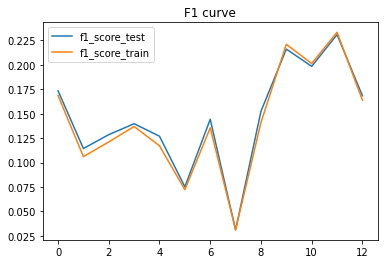

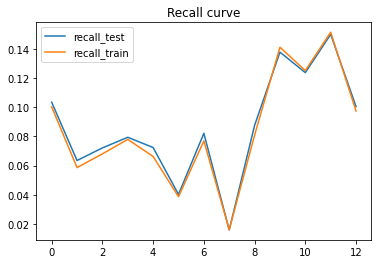

In [ ]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

plt.plot(recall_test)
plt.plot(recall_train)
plt.legend(('recall_test','recall_train'))
plt.title('Recall curve')
plt.show()

### Model 6: BernoulliNB(Binary Classification)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

auc_train=[]
auc_test=[]

chunksize = 5000

estimator = BernoulliNB()
for i,chunk in enumerate(pd.read_csv('bank_final_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk= chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk,classes=np.unique(y_test))
    
    y_pred_test = estimator.predict_proba(X_test)[:,1]
    y_pred_train = estimator.predict_proba(X_train)[:,1]
    
    auc_tr=roc_auc_score(y_train,y_pred_train,average='micro')
    auc_te=roc_auc_score(y_test,y_pred_test, average='micro')
    
    auc_train.append(auc_tr)
    auc_test.append(auc_te)

In [ ]:
print('Average AUC Score : {0:0.2f}' .format(sum(auc_test)/len(auc_test)))

Average AUC Score : 0.63


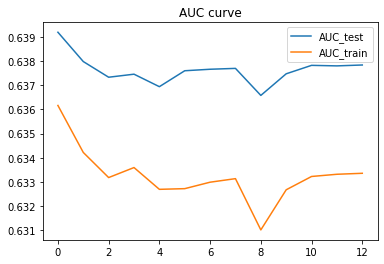

In [ ]:
plt.plot(auc_train)
plt.plot(auc_test)
plt.legend(('AUC_test','AUC_train'))
plt.title('AUC curve')
plt.show()

### Model 7: Random Forest(Binary Classification)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

f1_score_train = []
f1_score_test = []

recall_train = []
recall_test = []

chunksize = 5000

estimator = RandomForestClassifier(n_estimators = 50, warm_start=True)
for i,chunk in enumerate(pd.read_csv('bank_final_normal.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk= chunk.iloc[:,-1]
    
    estimator.fit(X_chunk,y_chunk)
    estimator.set_params(n_estimators = 100+50*i)
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test, pos_label=0)
    f_ta = f1_score(y_train,y_pred_train,pos_label=0)
    
    rc_train=recall_score(y_train,y_pred_train,pos_label=0)
    rc_test=recall_score(y_test,y_pred_test, pos_label=0)
    
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    
    recall_train.append(rc_train)
    recall_test.append(rc_test)

In [ ]:

print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))

print('Average Recall score is : {0:0.2f}'.format(sum(recall_test)/len(recall_test)))

Average f1 score :  0.27
Average Recall score is : 0.17


In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.15      0.25      3705
           1       0.73      0.98      0.84      8801

    accuracy                           0.73     12506
   macro avg       0.73      0.56      0.54     12506
weighted avg       0.73      0.73      0.66     12506



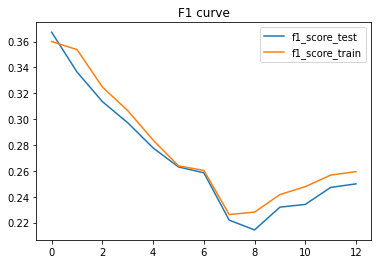

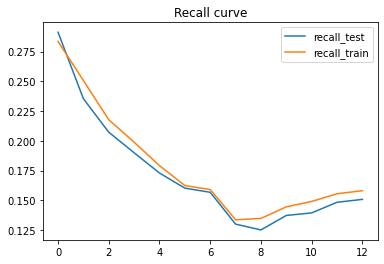

In [ ]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

plt.plot(recall_test)
plt.plot(recall_train)
plt.legend(('recall_test','recall_train'))
plt.title('Recall curve')
plt.show()

## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pca.n_components_

8

In [ ]:
X = pca.transform(X)

X_f=pd.DataFrame(X, index=df.index)

In [ ]:
final_loan = pd.concat((X_f,y), axis=1, join='outer')

In [ ]:
final_loan.to_csv('bank_final.csv')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_f,y, test_size=0.20, random_state=50)

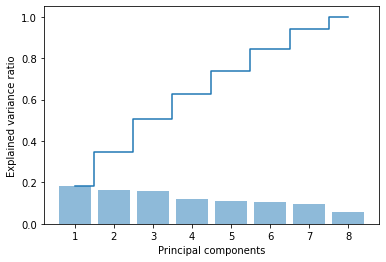

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

## BINARY CLASS CLASSIFICATION

### Model 8: SVM with L1(PCA/Binary Classification)

In [ ]:
f1_score_train = []
f1_score_test = []

recall_train = []
recall_test = []

chunksize = 5000

estimator = SGDClassifier(loss='hinge', penalty='l1', l1_ratio=1)
for i,chunk in enumerate(pd.read_csv('bank_final.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test,pos_label=0)
    f_ta = f1_score(y_train,y_pred_train, pos_label=0)
    
    rc_test=recall_score(y_test,y_pred_test, pos_label=0)
    rc_train=recall_score(y_train,y_pred_train, pos_label=0)
       
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    
    recall_train.append(rc_train)
    recall_test.append(rc_test)

In [ ]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))

print('Average Recall score is : {0:0.2f}'.format(sum(recall_test)/len(recall_test)))

Average f1 score :  0.31
Average Recall score is : 0.30


In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.39      0.31      0.35      3705
           1       0.73      0.80      0.76      8801

    accuracy                           0.65     12506
   macro avg       0.56      0.55      0.55     12506
weighted avg       0.63      0.65      0.64     12506



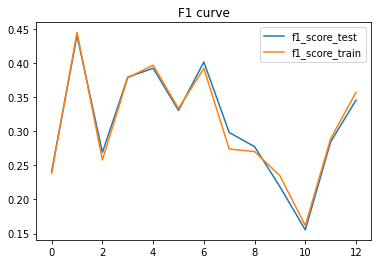

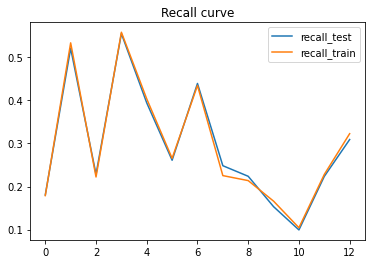

In [ ]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

plt.plot(recall_test)
plt.plot(recall_train)
plt.legend(('recall_test','recall_train'))
plt.title('Recall curve')
plt.show()


### Model 9: Logistic Regression with L1(PCA/Binary Classification)

In [ ]:
#Logistic Regression

auc_train = []
auc_test = []

chunksize = 5000

estimator = SGDClassifier(loss='log', penalty='l1', l1_ratio=1)
for i,chunk in enumerate(pd.read_csv('bank_final.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict_proba(X_test)[:,1]
    y_pred_train = estimator.predict_proba(X_train)[:,1]
    
    auc_tr=roc_auc_score(y_train,y_pred_train,average='micro')
    auc_te=roc_auc_score(y_test,y_pred_test, average='micro')
    
    auc_train.append(auc_tr)
    auc_test.append(auc_te)

In [ ]:
print('Average AUC Score : {0:0.2f}' .format(sum(auc_test)/len(auc_test)))

Average AUC Score : 0.60


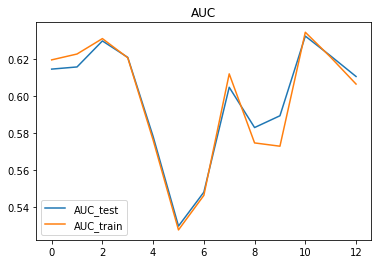

In [ ]:

plt.plot(auc_train)
plt.plot(auc_test)
plt.legend(('AUC_test','AUC_train'))
plt.title('AUC')
plt.show()

### Model 10:SVM with L2(PCA/Binary Classification)

In [ ]:
f1_score_train = []
f1_score_test = []

recall_train = []
recall_test = []

chunksize = 5000

estimator = SGDClassifier(loss='hinge', penalty='l2', l1_ratio=0)
for i,chunk in enumerate(pd.read_csv('bank_final.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test, pos_label=0)
    f_ta = f1_score(y_train,y_pred_train, pos_label=0)
    
    rc_test = recall_score(y_test,y_pred_test, pos_label=0)
    rc_train=recall_score(y_train, y_pred_train,pos_label=0)
    
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    
    recall_train.append(rc_train)
    recall_test.append(rc_test)

In [ ]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))

print('Average Recall score is : {0:0.2f}'.format(sum(recall_test)/len(recall_test)))


Average f1 score :  0.29
Average Recall score is : 0.30


In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.52      0.03      0.07      3705
           1       0.71      0.99      0.82      8801

    accuracy                           0.70     12506
   macro avg       0.61      0.51      0.44     12506
weighted avg       0.65      0.70      0.60     12506



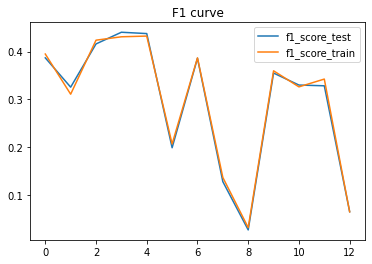

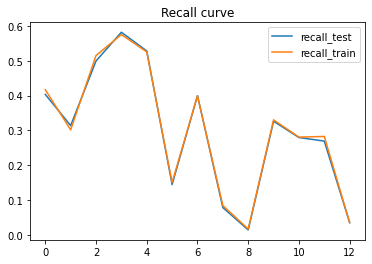

In [ ]:

plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

plt.plot(recall_test)
plt.plot(recall_train)
plt.legend(('recall_test','recall_train'))
plt.title('Recall curve')
plt.show()

Gaussian Kernel

In [ ]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 221 3484]
 [ 135 8666]]
              precision    recall  f1-score   support

           0       0.62      0.06      0.11      3705
           1       0.71      0.98      0.83      8801

    accuracy                           0.71     12506
   macro avg       0.67      0.52      0.47     12506
weighted avg       0.69      0.71      0.61     12506



Sigmoid Kernel

In [ ]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1263 2442]
 [2259 6542]]
              precision    recall  f1-score   support

           0       0.36      0.34      0.35      3705
           1       0.73      0.74      0.74      8801

    accuracy                           0.62     12506
   macro avg       0.54      0.54      0.54     12506
weighted avg       0.62      0.62      0.62     12506



### Model 11:Logistic Regression with L2 (PCA/Binary Classification)

In [ ]:
auc_train = []
auc_test = []

chunksize = 5000

estimator = SGDClassifier(loss='log', penalty='l2', l1_ratio=0)
for i,chunk in enumerate(pd.read_csv('bank_final.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk = chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk, classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    auc_tr=roc_auc_score(y_train,y_pred_train,average='micro')
    auc_te=roc_auc_score(y_test,y_pred_test, average='micro')
    
    auc_train.append(auc_tr)
    auc_test.append(auc_te)

In [ ]:
print('Average AUC Score : {0:0.2f}' .format(sum(auc_test)/len(auc_test)))

Average AUC Score : 0.53


In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.25      0.06      0.10      3705
           1       0.70      0.92      0.79      8801

    accuracy                           0.67     12506
   macro avg       0.47      0.49      0.45     12506
weighted avg       0.57      0.67      0.59     12506



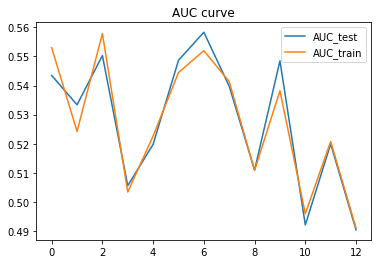

In [ ]:

plt.plot(auc_train)
plt.plot(auc_test)
plt.legend(('AUC_test','AUC_train'))
plt.title('AUC curve')
plt.show()

### Model 12:Multi Layer Perceptron (PCA/Binary Classification)

In [ ]:
from sklearn.neural_network import MLPClassifier

f1_score_train = []
f1_score_test = []

recall_test = []
recall_train = []

chunksize = 5000

estimator = MLPClassifier(hidden_layer_sizes=(2056,),alpha=0.1)
for i,chunk in enumerate(pd.read_csv('bank_final.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk= chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk,classes=np.unique(y_test))
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test)
    f_ta = f1_score(y_train,y_pred_train)
    
    rc_train=recall_score(y_train, y_pred_train, pos_label=0)
    rc_test=recall_score(y_test, y_pred_test, pos_label=0)
    
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    
    recall_train.append(rc_train)
    recall_test.append(rc_test)

In [ ]:
print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))

print('Average Recall score is : {0:0.2f}'.format(sum(recall_test)/len(recall_test)))

Average f1 score :  0.82
Average Recall score is : 0.11


In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.51      0.12      0.19      3705
           1       0.72      0.95      0.82      8801

    accuracy                           0.71     12506
   macro avg       0.62      0.54      0.51     12506
weighted avg       0.66      0.71      0.63     12506



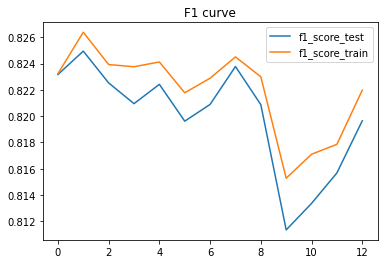

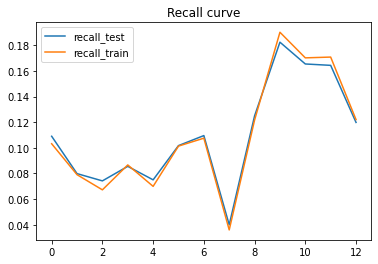

In [ ]:
plt.plot(f1_score_test)
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

plt.plot(recall_test)
plt.plot(recall_train)
plt.legend(('recall_test','recall_train'))
plt.title('Recall curve')
plt.show()


### Model 13:BernoulliNB (PCA/Binary Classification)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

auc_train = []
auc_test = []

chunksize = 5000

estimator = BernoulliNB()
for i,chunk in enumerate(pd.read_csv('bank_final.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk= chunk.iloc[:,-1]
    estimator.partial_fit(X_chunk,y_chunk,classes=np.unique(y_test))
    
    y_pred_test = estimator.predict_proba(X_test)[:,1]
    y_pred_train = estimator.predict_proba(X_train)[:,1]
    
    auc_tr=roc_auc_score(y_train,y_pred_train,average='micro')
    auc_te=roc_auc_score(y_test,y_pred_test, average='micro')
    
    auc_train.append(auc_tr)
    auc_test.append(auc_te)

In [ ]:
print('Average AUC Score : {0:0.2f}' .format(sum(auc_test)/len(auc_test)))


Average AUC Score : 0.61


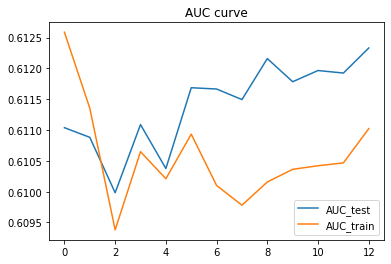

In [ ]:

plt.plot(auc_train)
plt.plot(auc_test)
plt.legend(('AUC_test','AUC_train'))
plt.title('AUC curve')
plt.show()

### Model 14:Random Forest (PCA/Binary Classification)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

f1_score_train = []
f1_score_test = []

recall_train = []
recall_test = []

chunksize = 5000

estimator = RandomForestClassifier(n_estimators = 50, warm_start=True)
for i,chunk in enumerate(pd.read_csv('bank_final.csv', chunksize=chunksize)):
    X_chunk = chunk.iloc[:,1:-1]
    y_chunk= chunk.iloc[:,-1]
    
    estimator.fit(X_chunk,y_chunk)
    estimator.set_params(n_estimators = 100+50*i)
    
    y_pred_test = estimator.predict(X_test)
    y_pred_train = estimator.predict(X_train)
    
    f_te = f1_score(y_test,y_pred_test, pos_label=0)
    f_ta = f1_score(y_train,y_pred_train,pos_label=0)
    
    rc_train=recall_score(y_train,y_pred_train,pos_label=0)
    rc_test=recall_score(y_test,y_pred_test, pos_label=0)
    
    f1_score_train.append(f_ta)
    f1_score_test.append(f_te)
    
    recall_train.append(rc_train)
    recall_test.append(rc_test)

In [ ]:

print('Average f1 score :  {0:0.2f}' .format(sum(f1_score_test)/len(f1_score_test)))

print('Average Recall score is : {0:0.2f}'.format(sum(recall_test)/len(recall_test)))

Average f1 score :  0.28
Average Recall score is : 0.18


In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.73      0.16      0.26      3705
           1       0.73      0.97      0.84      8801

    accuracy                           0.73     12506
   macro avg       0.73      0.57      0.55     12506
weighted avg       0.73      0.73      0.67     12506



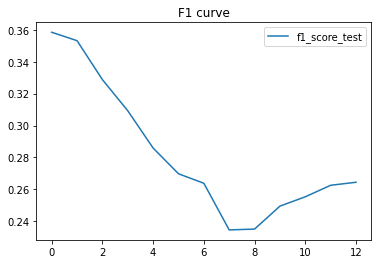

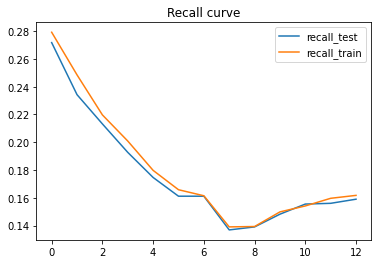

In [ ]:
plt.plot(f1_score_train)
plt.legend(('f1_score_test','f1_score_train'))
plt.title('F1 curve')
plt.show()

plt.plot(recall_test)
plt.plot(recall_train)
plt.legend(('recall_test','recall_train'))
plt.title('Recall curve')
plt.show()

## Feature Importance

In [ ]:
path = "/content/drive/My Drive/datasets/loan-prediction/BankLoanApprovalFinalDataset1.csv"
df_bank = pd.read_csv(path)
df_bank.head(5)

,Loan_Amount,Loan_Amount_Term,Credit_History,Annual_Income,Employed,Purpose,Home_Ownership,dti,Loan_Status
0,146.412162,360,1,5849.0,1,4,1,30.510709,1
1,128.000000,360,1,6091.0,1,4,1,30.503228,0
2,66.000000,360,1,3000.0,1,4,1,30.577049,1
3,120.000000,360,1,4941.0,1,4,1,30.531795,1
4,141.000000,360,1,6000.0,1,4,1,30.506485,1


In [ ]:
y = df_bank['Loan_Status']
df_bank.drop(['Loan_Status'], axis=1, inplace=True)

[0.19041272 0.01661374 0.00563634 0.31433059 0.00298483 0.05233184
 0.02131366 0.39637628]


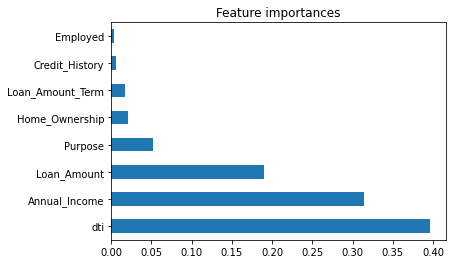

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(criterion='gini') # “gini” for the Gini impurity and “entropy” for the information gain.
model.fit(df_bank, y)
print(model.feature_importances_) # use inbuilt class feature_importances of tree based classifiers
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df_bank.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Feature importances")
plt.show()

In [ ]:
feat_importances

Loan_Amount         0.190413
Loan_Amount_Term    0.016614
Credit_History      0.005636
Annual_Income       0.314331
Employed            0.002985
Purpose             0.052332
Home_Ownership      0.021314
dti                 0.396376
dtype: float64

## Conclusion

Model 1: SVM with L1(Binary) - 0.68

Model 2:Logistic Regression with L1(Binary) - 0.57

Model 3:SVM with L2(Binary) - 0.70

Model 4:Logistic Regression with L2(Binary) - 0.58

Model 5: Multi Layer Perceptron(Binary Classification) - 0.71

Model 6: BernoulliNB(Binary Classification) -0.63

Model 7: Random Forest(Binary Classification) - 0.73

Model 8: SVM with L1(PCA/Binary Classification) - 0.65

Model 9: Logistic Regression with L1(PCA/Binary Classification) -0.60

Model 10:SVM with L2(PCA/Binary Classification) - 0.70

Model 11:Logistic Regression with L2 (PCA/Binary Classification) -0.67

Model 12:Multi Layer Perceptron (PCA/Binary Classification) -0.71

Model 13:BernoulliNB (PCA/Binary Classification) - 0.61

Model 14:Random Forest (PCA/Binary Classification) -0.73

We have got the best accuracy of 0.73 with Random Forest classifier with and without PCA.